# 1.1 Loading the Data

In [3724]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3725]:
# import as pandas dataframe
day_df = pd.read_csv("./Bike Sharing Dataset/day.csv")

In [3726]:
# explore data

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3727]:
# get number of samples (rows), number of features (columns), feature names, and data types

print(f"Number of samples: {day_df.shape[0]}")
print(f"Number of features: {day_df.shape[1]}") # NOTE: we don't believe that "instant" 
                                                # counts as a feature, but it is still counted here

# feature names
print(f"Feature names: {', '.join(day_df.columns)}") # NOTE: "instant" is still listed here as well

# determine datatypes for each feature
data_types = [str(x) for x in day_df.dtypes]
print(f"Data types: {', '.join(data_types)}")

Number of samples: 731
Number of features: 16
Feature names: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Data types: int64, object, int64, int64, int64, int64, int64, int64, int64, float64, float64, float64, float64, int64, int64, int64


Regarding data types, the data source further categorizes each variable, revealing the variable types rather than just the data types. This information is summarized below:

instant: Integer  
dteday: Date  
season: Categorical  
yr: Categorical  
mnth: Categorical  
holiday: Binary  
weekday: Categorical  
workingday: Binary  
weathersit: Categorical  
temp: Continuous  
atemp: Continuous  
hum: Continuous  
windspeed: Continuous  
casual: Integer  
registered: Integer  
cnt: Integer  

In [3728]:
# the description of 'weathersit' from the data source is a bit strange, so we want to confirm how many categories 
# actually exist

print(day_df["weathersit"].unique())

[2 1 3]


In [3729]:
# similarly, we want to check how the range of values works for temp and atemp, 
# as the source description says that the min and max temps are only for the hourly dataset

print(f"temp min: {day_df["temp"].min()}, temp max: {day_df["temp"].max()}")
print(f"atemp min: {day_df["atemp"].min()}, atemp max: {day_df["atemp"].max()}")

temp min: 0.0591304, temp max: 0.861667
atemp min: 0.0790696, atemp max: 0.840896


In [3730]:
# the above confirms that these "normalized" values don't actually cover the full range of 
# temperatures measured, as the daily set loses several data points compared to the hourly set

# because of this, we will also check the ranges of the other continuous, normalized variables:
print(f"hum min: {day_df["hum"].min()}, hum max: {day_df["hum"].max()}")
print(f"windspeed min: {day_df["windspeed"].min()}, windspeed max: {day_df["windspeed"].max()}")

hum min: 0.0, hum max: 0.9725
windspeed min: 0.0223917, windspeed max: 0.507463


To explore this further, the hour.csv dataset was also downloaded, and the ranges of these continuous variables was further analyzed. 

In [3731]:
# import as pandas dataframe
hour_df = pd.read_csv("./Bike Sharing Dataset/hour.csv")

In [3732]:
# check ranges of each continuous variable

print(f"temp min: {hour_df["temp"].min()}, temp max: {hour_df["temp"].max()}")
print(f"atemp min: {hour_df["atemp"].min()}, atemp max: {hour_df["atemp"].max()}")
print(f"hum min: {hour_df["hum"].min()}, hum max: {hour_df["hum"].max()}")
print(f"windspeed min: {hour_df["windspeed"].min()}, windspeed max: {hour_df["windspeed"].max()}")

temp min: 0.02, temp max: 1.0
atemp min: 0.0, atemp max: 1.0
hum min: 0.0, hum max: 1.0
windspeed min: 0.0, windspeed max: 0.8507


Based on this, it appears that the scaling for the first three variables is based on the range of the column, except for windspeed, it appears to just have been scaled based on a theoretical maximum. Thus, for temp, atemp, and hum, we will rescale the values to again fit between 0 and 1 for our day data (as this seems to have been the original intention), but for windspeed, we will simply keep it as it is. See "Feature Scaling and Normalization" for this step. 

In [3733]:
# min-max scaling 

day_df['temp'] = (day_df['temp'] - day_df['temp'].min()) / (day_df['temp'].max() - day_df['temp'].min())
print(f"New temp min: {day_df["temp"].min()}, New temp max: {day_df["temp"].max()}")

day_df['atemp'] = (day_df['atemp'] - day_df['atemp'].min()) / (day_df['atemp'].max() - day_df['atemp'].min())
print(f"New atemp min: {day_df["atemp"].min()}, New atemp max: {day_df["atemp"].max()}")

day_df['hum'] = (day_df['hum'] - day_df['hum'].min()) / (day_df['hum'].max() - day_df['hum'].min())
print(f"New hum min: {day_df["hum"].min()}, New hum max: {day_df["hum"].max()}")

New temp min: 0.0, New temp max: 1.0
New atemp min: 0.0, New atemp max: 1.0
New hum min: 0.0, New hum max: 1.0


# 1.2 Data Cleaning and Preprocessing

## Missing or Malformed Values

In [3734]:
# count NaN entries per column
count = day_df.isna().sum()
print(f"NaN entries per column:\n{count}")

# interestingly, it doesn't seem that there are any NaN values

NaN entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [3735]:
# count ? entries per column
count_ques = (day_df == "?").sum()
print(f"\"?\" entries per column:\n{count_ques}")

"?" entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Based on this brief analysis, it seems that the data are fairly clean. Visting the data source, it is confirmed that none of the columns have missing variables. 

## Irrelevant or Identifier Features

In [3736]:
# removing "instant" (a sample ID) and "cnt" (the target variable)
# we also drop dteday, since we already have 'yr', 'mnth' and 'weekday', making 'dteday' redundant, 
# and essentially just another index. 
# plus, we can't use a field of type 'object' in our matrix calculations for linear regression
# we remove "casual" and "registered", as their sum gives "cnt"

day_input = day_df.drop(columns = ["instant", "dteday", "cnt", "casual", "registered"])

# confirm the drop
print(f"New features: {', '.join(day_input.columns)}")

New features: season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed


In [3737]:
# create a dataframe for just the output column: 
day_output = day_df["cnt"]

## Feature Scaling and Normalization

According to the data source, all continuous variables in this dataset have already been normalized. However, as previously discussed, some need to be rescaled. 

In [3738]:
# min-max scaling 

day_df['temp'] = (day_df['temp'] - day_df['temp'].min()) / (day_df['temp'].max() - day_df['temp'].min())
print(f"New temp min: {day_df["temp"].min()}, New temp max: {day_df["temp"].max()}")

day_df['atemp'] = (day_df['atemp'] - day_df['atemp'].min()) / (day_df['atemp'].max() - day_df['atemp'].min())
print(f"New atemp min: {day_df["atemp"].min()}, New atemp max: {day_df["atemp"].max()}")

day_df['hum'] = (day_df['hum'] - day_df['hum'].min()) / (day_df['hum'].max() - day_df['hum'].min())
print(f"New hum min: {day_df["hum"].min()}, New hum max: {day_df["hum"].max()}")

New temp min: 0.0, New temp max: 1.0
New atemp min: 0.0, New atemp max: 1.0
New hum min: 0.0, New hum max: 1.0


## Categorical (Discrete) Features

Of the remaining features (as previously discussed), "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", and "weathersit" are categorical or binary. The binary variables do not need to be one-hot encoded (because they sort of already are). This is the case for "holiday", and "workingday". Similarly, "yr" only has two categories so does not need to be modified either. 

While "season" and "weekday" are cyclical, they are not technically oridinal, as, for example, summer is not "larger" than spring or winter. Thus, they will be one-hot encoded. 

Though a bit large, we will include "mnth" as well, due to its similarly cyclical nature. 

Finally, we will one-hot encode "weathersit", as this is clearly categorical, with only a few, non-ordinal categories. 

In [3739]:
# replace columns with one-hot encoded versions

encoded_df = pd.get_dummies(day_input, columns=["season", "weathersit", "weekday", "mnth"],
                        dtype=int, drop_first=True)

# drop_first=True saves us a column, and is ideal for linear regression
# (keeps the columns more independent)

print(encoded_df.head())

   yr  holiday  workingday      temp     atemp       hum  windspeed  season_2  \
0   0        0           0  0.355170  0.373517  0.828620   0.160446         0   
1   0        0           0  0.379232  0.360541  0.715771   0.248539         0   
2   0        0           1  0.171000  0.144830  0.449638   0.248309         0   
3   0        0           1  0.175530  0.174649  0.607131   0.160296         0   
4   0        0           1  0.209120  0.197158  0.449313   0.186900         0   

   season_3  season_4  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  \
0         0         0  ...       0       0       0       0       0       0   
1         0         0  ...       0       0       0       0       0       0   
2         0         0  ...       0       0       0       0       0       0   
3         0         0  ...       0       0       0       0       0       0   
4         0         0  ...       0       0       0       0       0       0   

   mnth_9  mnth_10  mnth_11  mnth_12  
0    

In [3740]:
print(encoded_df.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype='object')


## 1.3 Data Visualization and Exploratory Analysis

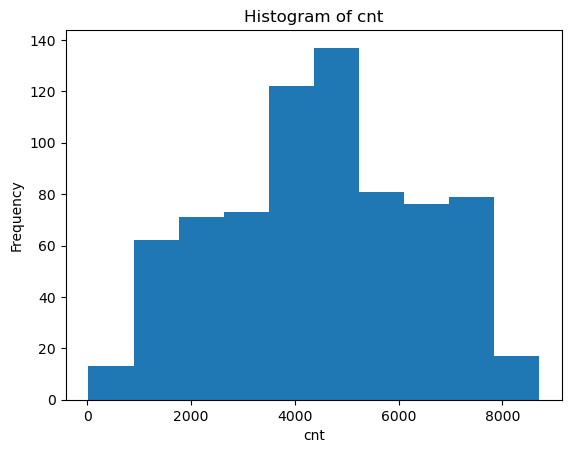

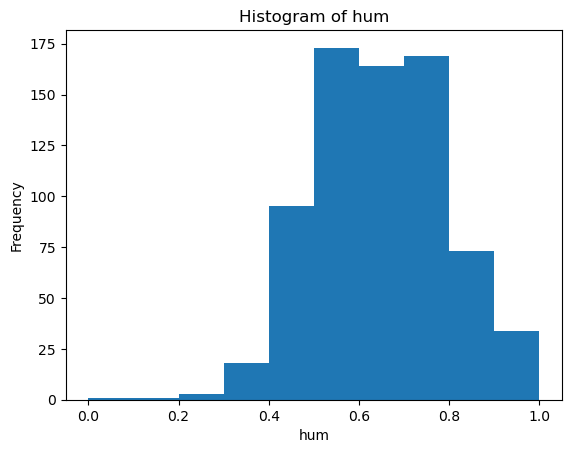

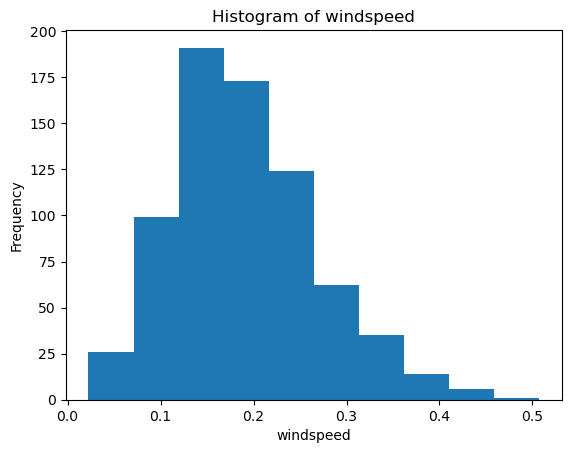

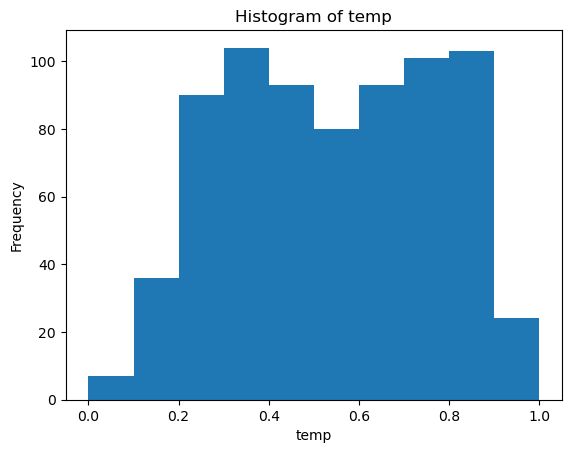

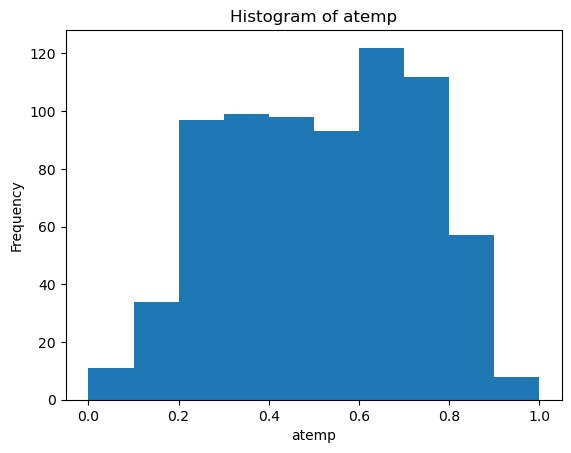

In [3741]:
import matplotlib.pyplot as plt

hist_list = ["cnt", "hum", "windspeed", "temp", "atemp"]

for x in hist_list:
    day_df[x].hist()
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {x}")
    plt.grid(False)
    plt.show()

"cnt" appears to be roughly normally distributed, and symmetrical, as do temp and atemp. hum appears to be right skewed, while windspeed seems left skewed. We can also see that our rescaling was successful. 

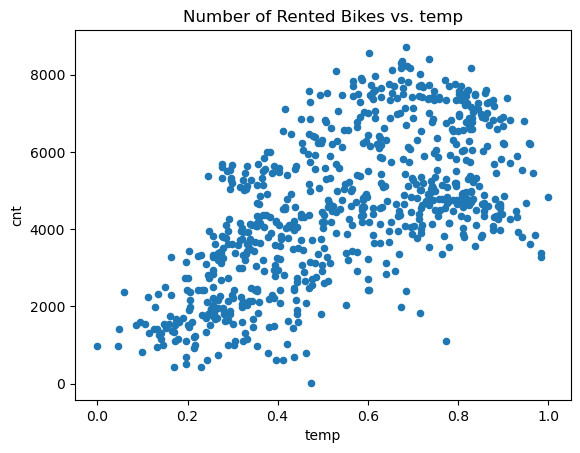

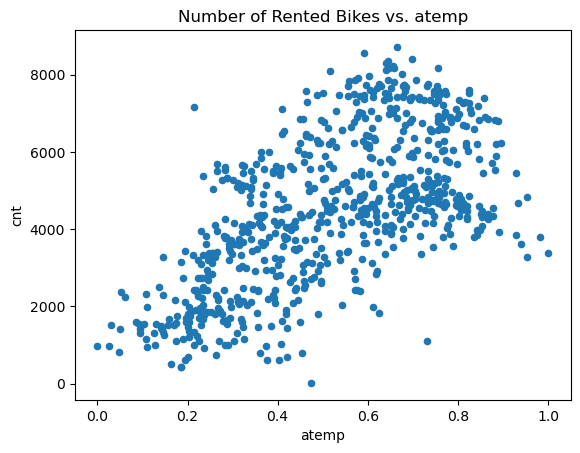

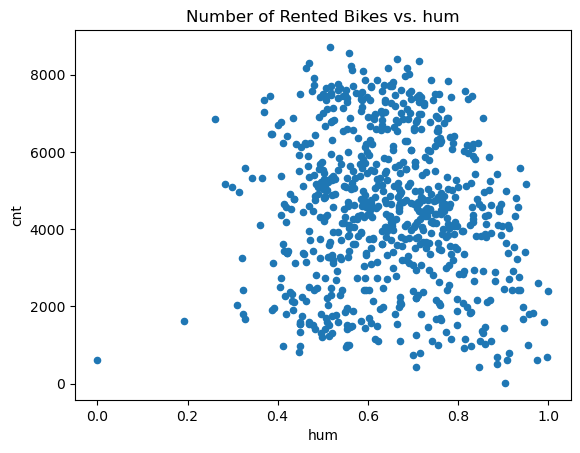

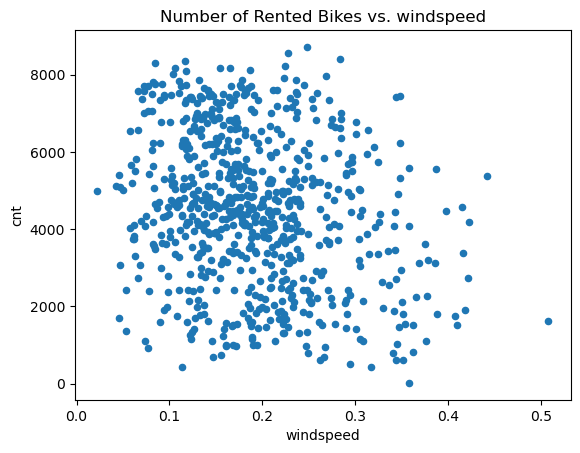

In [3742]:
# scatter plots

scatter_list = ["temp", "atemp", "hum", "windspeed"]

for s in scatter_list:
    day_df.plot.scatter(x=s, y="cnt")
    plt.title(f"Number of Rented Bikes vs. {s}")
    plt.show()

Above, we can see that cnt has a roughly positive correlation with temp and atemp, but no clear correlation with hum nor windspeed. 

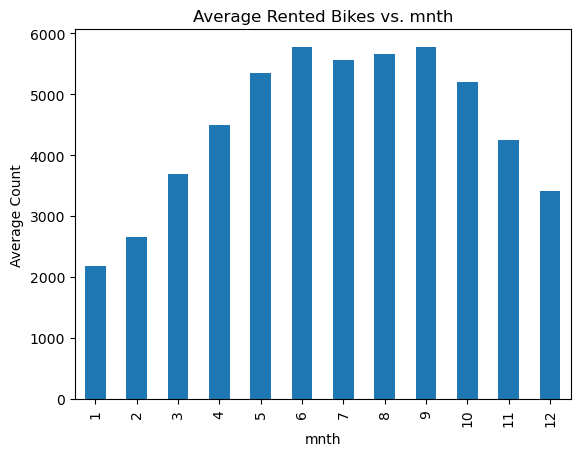

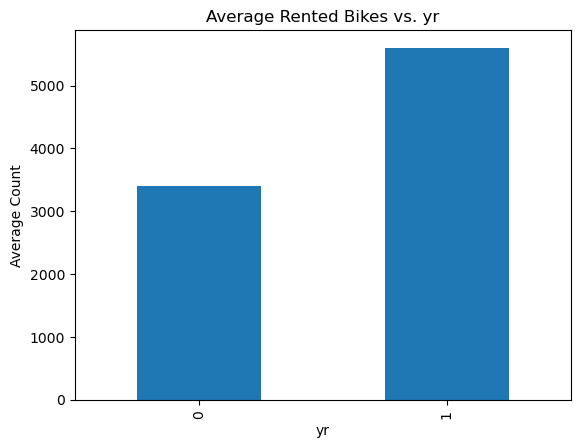

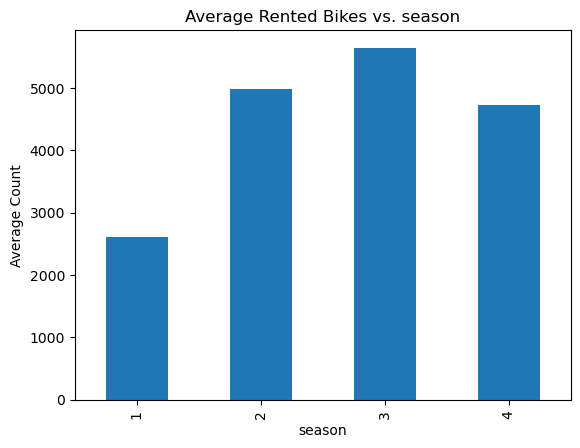

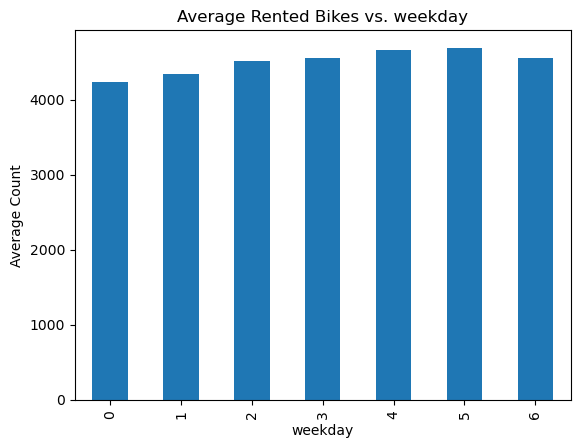

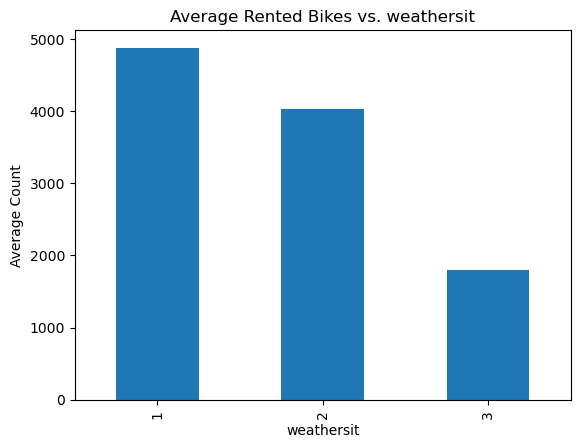

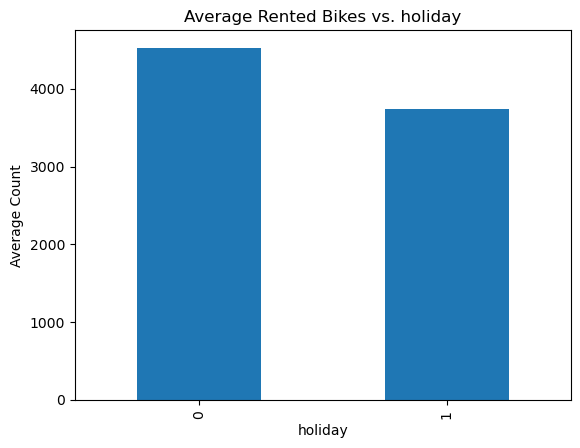

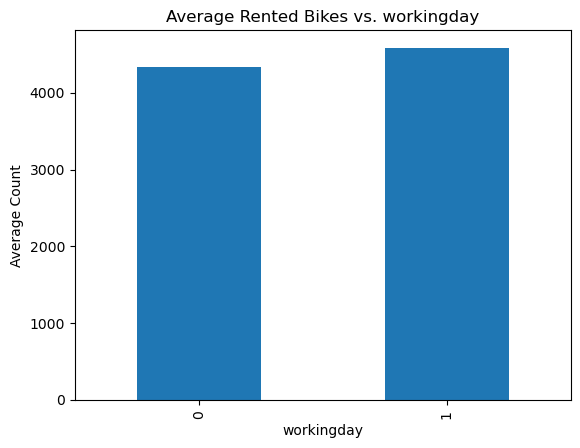

In [3743]:
# bar plots

bar_list = ["mnth", "yr", "season", "weekday", "weathersit", "holiday", "workingday"]

for b in bar_list:
    day_df.groupby(b)['cnt'].mean().plot.bar() # average number sold in each category
    
    plt.title(f"Average Rented Bikes vs. {b}")
    plt.ylabel("Average Count")
    plt.show()

These bar plots show the average for each category of each variable. Below, we also show the full scatterplots to get a fuller picture. 

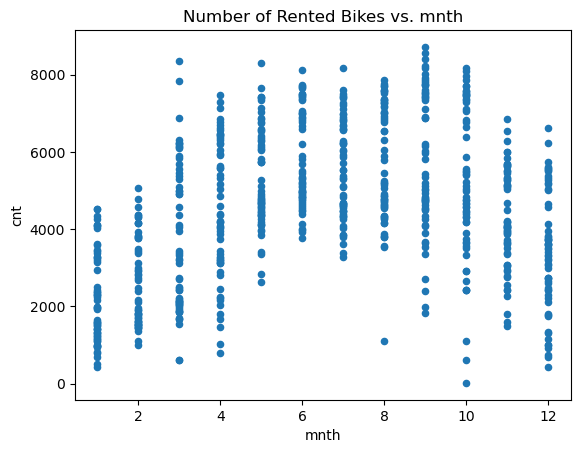

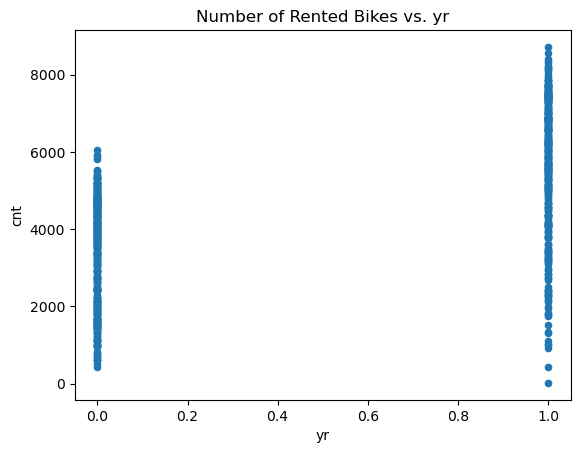

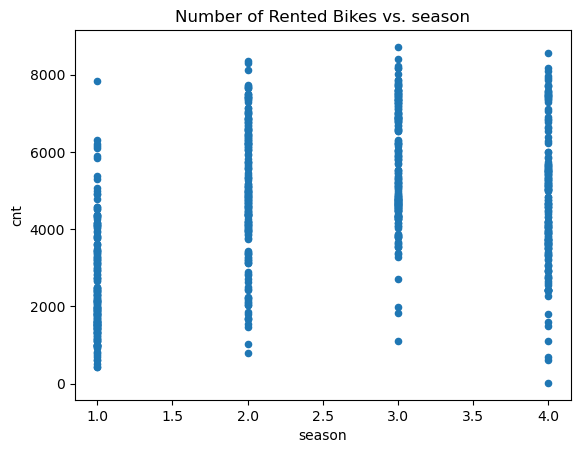

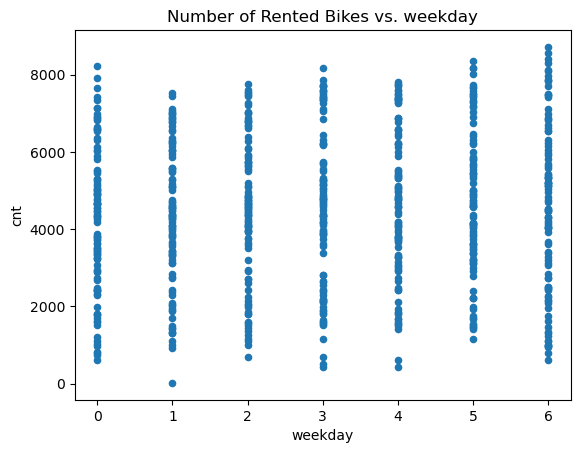

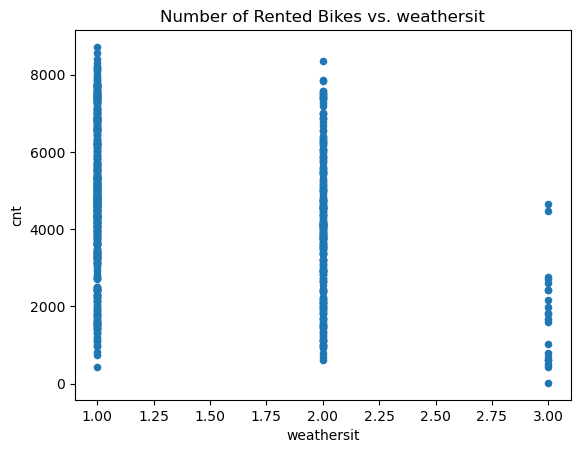

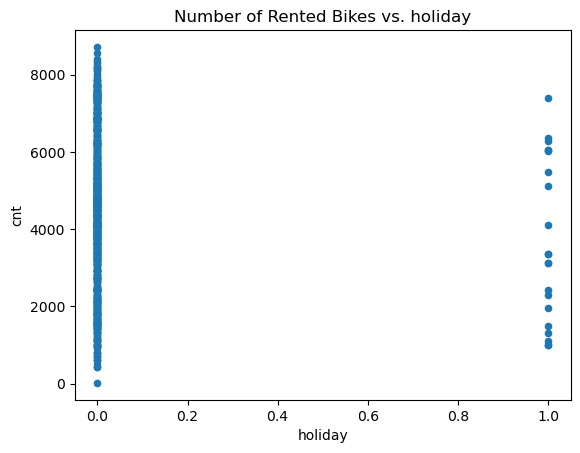

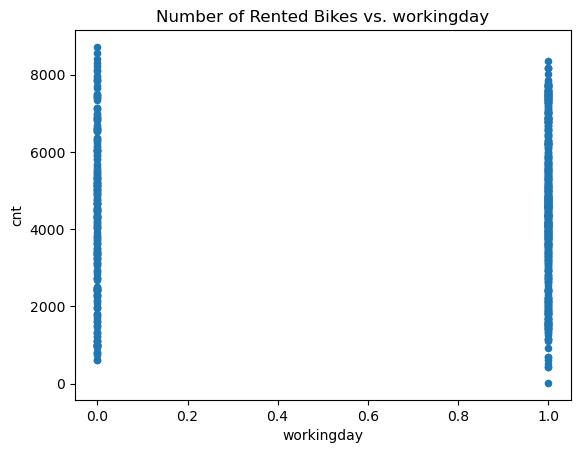

In [3744]:
# more scatter plots

scatter_list = ["mnth", "yr", "season", "weekday", "weathersit", "holiday", "workingday"]

for s in scatter_list:
    day_df.plot.scatter(x=s, y="cnt")
    plt.title(f"Number of Rented Bikes vs. {s}")
    plt.show()

There are a lot of plots above, so we will discuss each one briefly:

mnth: there is a strong visual trend here, with more bikes sold in the middle (summer) months compared to the early and late months.

yr: it seems that more bikes were sold in the 2012 (1) than 2011 (0). 

season: Again, it looks like more bikes are sold in the spring and summer (2 and 3) vs the fall and winter (4 and 1). 

weekday: there doesn't seem to be a very strong trend here, although it could perhaps be argued that more bikes are sold on days 5, 6, and maybe 0 (which likely correspond to Saturday, Sunday, and Monday, respectively). 

weathersit: It is clear that far few bikes are sold when it is partly cloudy out (3). 

holiday: Given the large class inbalance, it is hard to say whether there is any correlation here, at least visually. 

workingday: though not a visually strong trend, it does seem that more bikes are sold on non-working days.

# 2.1 Model Implementation

To implement the linear regression model, we use the closed-form solution, which seeks to find the weight vector w that minimizes the sum of squared residuals. A crucial first step is the construction of the Design Matrix ($X$), where we append a column of ones to the raw feature set to act as a multiplier for the bias term (intercept), ensuring the model is not forced to pass through the origin. As per the instructions, we avoid matrix inversion to maintain numerical stability. Instead, we use this formula:$$(X^T X)\mathbf{w} = X^T \mathbf{y}$$

In [3745]:
class LinearRegression:
    def __init__(self):
        self.weights = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        X: Design matrix (NumPy array)
        y: Target vector (NumPy array)
        """
        # 1. Add the bias term (intercept)
        # Add column of ones as the first column of X
        ones = np.ones((X.shape[0], 1))
        X_design = np.append(ones, X, axis=1)
        
        # 2. Compute the components of the Equation
        # X^T * X
        XTX = X_design.T @ X_design
        # X^T * y
        XTy = X_design.T @ y
        
        # 3. Solve for weights (w)
        self.weights = np.linalg.solve(XTX, XTy)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the target values for the given features.
        """
        # Add the same bias term (ones) for prediction
        ones = np.ones((X.shape[0], 1))
        X_design = np.append(ones, X, axis=1)
        
        # y_hat = X * w
        return X_design @ self.weights
        
        

# 2.2 Train/test split

To ensure the model generalizes well to unseen data, we split the dataset into a training set (80%) and a test set (20%). Since the original data is ordered chronologically by date, we first performed a random shuffle of the data indices. This prevents the model from learning a bias based on time; for example, training only on data from the first year and testing on data from the second year. Shuffling ensures that both the training and test sets contain a representative distribution of seasons, weather conditions, etc. We also set a random seed (21) to ensure that our 'random' shuffle is reproducible, allowing for consistent results across different experimental runs.

In [3746]:
# X is our feature set
X = encoded_df.values
# y is our target: the total count of rented bikes
y = day_df['cnt'].values

In [3747]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}") 

Shape of X: (731, 29)
Shape of y: (731,)


In [3748]:
encoded_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0.355170,0.373517,0.828620,0.160446,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.379232,0.360541,0.715771,0.248539,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.248309,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.160296,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.186900,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.243025,0.193709,0.671380,0.350133,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,1,0.241986,0.230993,0.606684,0.155471,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.241986,0.214393,0.774208,0.124383,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.497001,0.350754,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3749]:
# 1. Set a random seed for reproducibility 
np.random.seed(21)

In [3750]:
# 2. Generate shuffled indices
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

In [3751]:
# 3. Calculate the number of samples for training data
TRAINING_DATA_SPLIT = 0.8
training_data_size = int(TRAINING_DATA_SPLIT * num_samples)

In [3752]:
# 4. Split the samples between training/test data
train_data_indices = indices[:training_data_size]
test_data_indices = indices[training_data_size:]

In [3753]:
# 5. Create the actual datasets
X_train, X_test = X[train_data_indices], X[test_data_indices]
y_train, y_test = y[train_data_indices], y[test_data_indices]

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 584
Test set size: 147


# 2.3 Evaluation metric

Here, we implemented the Mean Squared Error (MSE) as our evaluation metric, which was computed separately for both the training and test datasets. Based on our implementation, we achieved a Training MSE of 562,940 and a Test MSE of 620,802. Comparing these two values allows us to assess the model's ability to generalize. Since the error on the unseen test set is within a similar range as the training error, we can conclude that the model effectively captured the underlying patterns in the data rather than simply memorizing the training samples.

In [3754]:
# Get our linear regression model
model = LinearRegression()

In [3755]:
# Train model on training data set
model.fit(X=X_train, y=y_train)

In [3756]:
# Get predictions on data sets
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [3757]:
# Define the MSE function
def calculate_MSE(y_actual, y_pred):
    """
    Compute the Mean Squared Error between actual and predicted values.
    """
    # Formula: 1/n * sum((y_true - y_pred)^2)
    return np.mean((y_actual - y_pred) ** 2)

In [3758]:
# Compute the MSE scores
train_mse = calculate_MSE(y_actual=y_train, y_pred=y_hat_train)
test_mse = calculate_MSE(y_actual=y_test, y_pred=y_hat_test)
print(f"MSE on training set: {train_mse}")
print(f"MSE on test set: {test_mse}")

MSE on training set: 562939.9978182801
MSE on test set: 620802.2361993789


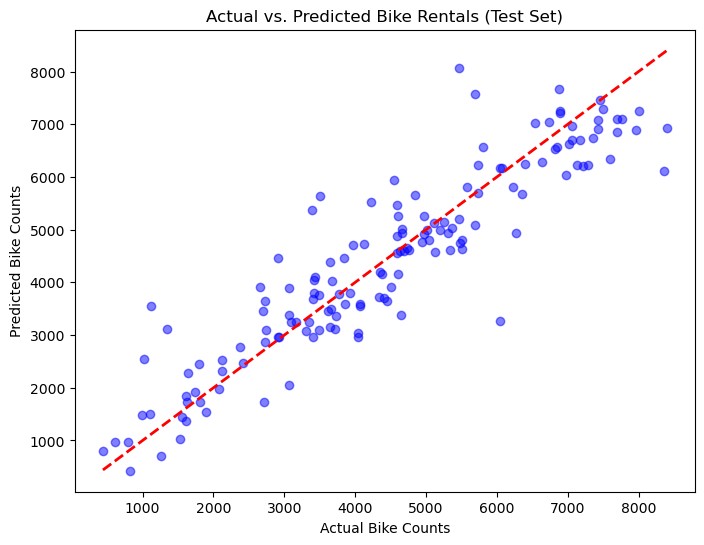

In [3759]:
#Show plot showing actual vs predicted bike counts
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
plt.xlabel('Actual Bike Counts')
plt.ylabel('Predicted Bike Counts')
plt.title('Actual vs. Predicted Bike Rentals (Test Set)')
plt.show()

# 3.1 Feature engineering

In [3760]:
encoded_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0.355170,0.373517,0.828620,0.160446,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.379232,0.360541,0.715771,0.248539,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.248309,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.160296,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.186900,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.243025,0.193709,0.671380,0.350133,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,1,0.241986,0.230993,0.606684,0.155471,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.241986,0.214393,0.774208,0.124383,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.497001,0.350754,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3761]:
# Our feature for feature engineering
new_features=[]
fe_df = encoded_df.copy()
X_orig = encoded_df.values
target = day_df['cnt'].copy()

In [3762]:
# atemp is a number heavly correlated with temp so we risk overfitting
fe_df["atemp"].corr(fe_df["temp"])

0.9917015532294636

In [3763]:


#Creating a continueous function out of one-hot encoded column working day using Gaussian distribution
non_working_day = abs(fe_df["workingday"].values.astype(int) - 1)
#Gaussian distribution with sigma = 2
x = np.arange(-8, 9)
cont_function = np.exp(-(x**2) / (2 * 2**2))* (1 / (np.sqrt(2 * np.pi) * 2))
cont_function = cont_function/np.sum(cont_function)
fe_df['non-workingday'] = np.convolve(non_working_day, cont_function, mode='same')
fe_df.drop("workingday", axis=1, inplace=True)
#This new feature contains the info about yesterday's rent number which is a good
#indicator of cnt since 2 consecutive days have almost the same vibe
fe_df['day_before'] = day_df['cnt'].shift(1)
fe_df['day_before'].fillna(day_df['cnt'][0], inplace=True)
#same for weeks
fe_df['week_before'] = day_df['cnt'].shift(7)
fe_df['week_before'].fillna(day_df['cnt'][0:10].median(), inplace=True)
# month cycle
fe_df['mnth_cont'] = abs(np.sin(2 * np.pi * day_df['mnth'] / 12))

# We didn't use atemp since it is a number heavly correlated with temp so we risk overfitting
cont_vars = ["temp", "hum", "windspeed", "non-workingday", "day_before",'week_before', 'mnth_cont']
num_vars = ['temp', 'hum', 'windspeed']

for var in num_vars:
    fe_df[f'{var}_dif'] = fe_df[var] - fe_df[var].shift(1).fillna(day_df[var].median())
    cont_vars.append(f"{var}_dif")
    
    
for var_i in cont_vars:
    #polynomial features (x^2)
    fe_df[f"{var_i}^2"] = fe_df[var_i]**2
    new_features.append(f"{var_i}^2")
    #interaction terms (x_i x_j)
    for var_j in cont_vars:
        #To avoid duplication of columns (since the value of x_i x_j = x_j x_i)
        if (var_i != var_j) and (f"{var_i} {var_j}" not in fe_df.columns and f"{var_j} {var_i}" not in fe_df.columns):
            fe_df[f"{var_i} {var_j}"] = fe_df[var_i] * fe_df[var_j]
            new_features.append(f"{var_i} {var_j}")

    #simple nonlinear transforms log(x)
    #Log transformation iff we have restrictly positive numbers in a feature
    if (fe_df[var_i] > 0).all():
        fe_df[f"log({var_i})"] = np.log(fe_df[var_i])
        new_features.append(f"log({var_i})")

/var/folders/gs/6ssy4q255_77knymc18_12d80000gn/T/ipykernel_25803/212406234.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fe_df['day_before'].fillna(day_df['cnt'][0], inplace=True)
/var/folders/gs/6ssy4q255_77knymc18_12d80000gn/T/ipykernel_25803/212406234.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [3764]:
# we try to drop the columns with no correlation with cnt
for feature in new_features:
    cor = fe_df[feature].corr(target)
    if abs(cor) < 0.17:
        fe_df.drop(feature, inplace=True, axis=1)
        print(f"column to drop {feature}")
 


column to drop temp temp_dif
column to drop temp hum_dif
column to drop temp windspeed_dif
column to drop hum^2
column to drop hum non-workingday
column to drop hum mnth_cont
column to drop hum temp_dif
column to drop hum windspeed_dif
column to drop windspeed mnth_cont
column to drop windspeed temp_dif
column to drop windspeed hum_dif
column to drop windspeed windspeed_dif
column to drop non-workingday^2
column to drop non-workingday mnth_cont
column to drop non-workingday temp_dif
column to drop non-workingday hum_dif
column to drop non-workingday windspeed_dif
column to drop log(non-workingday)
column to drop day_before temp_dif
column to drop day_before hum_dif
column to drop day_before windspeed_dif
column to drop week_before temp_dif
column to drop week_before hum_dif
column to drop week_before windspeed_dif
column to drop mnth_cont^2
column to drop mnth_cont temp_dif
column to drop mnth_cont hum_dif
column to drop mnth_cont windspeed_dif
column to drop log(mnth_cont)
column to d

In [3765]:
fe_df.columns


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'non-workingday',
       'day_before', 'week_before', 'mnth_cont', 'temp_dif', 'hum_dif',
       'windspeed_dif', 'temp^2', 'temp hum', 'temp windspeed',
       'temp non-workingday', 'temp day_before', 'temp week_before',
       'temp mnth_cont', 'hum windspeed', 'hum day_before', 'hum week_before',
       'hum hum_dif', 'windspeed^2', 'windspeed non-workingday',
       'windspeed day_before', 'windspeed week_before', 'log(windspeed)',
       'non-workingday day_before', 'non-workingday week_before',
       'day_before^2', 'day_before week_before', 'day_before mnth_cont',
       'log(day_before)', 'week_before^2', 'week_before mnth_cont',
    

# 3.2 Model retraining and analysis

We are running the model on different seed to get different shuffle and comapre the performance of our model in compairson to our original model to make sure that we did not risk overfitting

In [3766]:
#Redoing the LinearRegression on the feature engineered data frame and normalization
X_fe = fe_df.values
y_fe = day_df['cnt'].values
#Storing the value of our models to calcuate the avarage value and standard devation to check the performance of our model in different split
fe_train_mses, fe_test_mses = [], []
train_mses, test_mses = [], []
for i in range(10,90):
    np.random.seed(i)
    num_samples_fe = X_fe.shape[0]
    indices_fe = np.arange(num_samples_fe)
    np.random.shuffle(indices_fe)
    training_data_size = int(TRAINING_DATA_SPLIT * num_samples_fe)
    train_data_indices = indices_fe[:training_data_size]
    test_data_indices = indices_fe[training_data_size:]
    X_train, X_test = X_fe[train_data_indices], X_fe[test_data_indices]
    y_train, y_test = y_fe[train_data_indices], y_fe[test_data_indices]
    #Normalizing our test data set after adding new features
    scalar = StandardScaler()
    #Normalizing the training set
    X_train = scalar.fit_transform(X_train)
    #Normalizing the test using the value of mean and standard deviation of our training set
    X_test = scalar.transform(X_test)
  
    model = LinearRegression()
    model.fit(X=X_train, y=y_train)
    y_hat_train = model.predict(X_train)

    y_hat_test = model.predict(X_test)
    train_mse_fe = calculate_MSE(y_actual=y_train, y_pred=y_hat_train)
    test_mse_fe = calculate_MSE(y_actual=y_test, y_pred=y_hat_test)
    
    
    X_train, X_test = X[train_data_indices], X[test_data_indices]
    y_train, y_test = y[train_data_indices], y[test_data_indices]
    scalar_orig = StandardScaler()
    X_train = scalar_orig.fit_transform(X_train)
    X_test = scalar_orig.transform(X_test)
    
    model = LinearRegression()
    model.fit(X=X_train, y=y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    train_mse = calculate_MSE(y_actual=y_train, y_pred=y_hat_train)
    test_mse = calculate_MSE(y_actual=y_test, y_pred=y_hat_test)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    fe_train_mses.append(train_mse_fe)
    fe_test_mses.append(test_mse_fe)
    
print(f"avg train mse before feature engineering {np.mean(train_mses)}")
print(f"avg test mse before feature engineering  {np.mean(test_mses)}")
print(f"avg train mse after feature engineering  {np.mean(fe_train_mses)}")
print(f"avg test mse after feature engineering   {np.mean(fe_test_mses)}\n")

print(f"std train mse before feature engineering {np.std(train_mses)}")
print(f"std test mse before feature engineering  {np.std(test_mses)}")
print(f"std train mse after feature engineering  {np.std(fe_train_mses)}")
print(f"std test mse after feature engineering   {np.std(fe_test_mses)}")

avg train mse before feature engineering 557837.8839044087
avg test mse before feature engineering  650020.7682121409
avg train mse after feature engineering  307437.97084879957
avg test mse after feature engineering   432676.0351662553

std train mse before feature engineering 25304.057483563833
std test mse before feature engineering  106984.00784801258
std train mse after feature engineering  16250.803318595877
std test mse after feature engineering   74773.77497820387


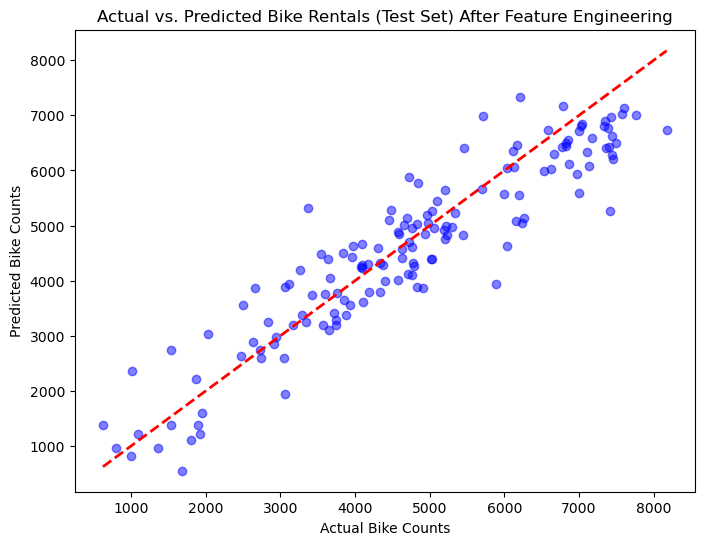

In [3767]:
#Show plot showing actual vs predicted bike counts after feature engineering
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
plt.xlabel('Actual Bike Counts')
plt.ylabel('Predicted Bike Counts')
plt.title('Actual vs. Predicted Bike Rentals (Test Set) After Feature Engineering')
plt.show()